<a href="https://colab.research.google.com/github/IagoMagalhaes23/Machine-Learning-com-Frameworks/blob/main/KNN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Algoritmo KNN para regressão - KNearest Neighbors Regression

#Aplicando KNN em uma base de dados de temperatura

##Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
plt.style.use("seaborn")

##Carregando base de dados

In [2]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('Arquivo carregado com sucesso! \n "{name}" com tamanho de {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving station_fortaleza_alterada.csv to station_fortaleza_alterada.csv
Arquivo carregado com sucesso! 
 "station_fortaleza_alterada.csv" com tamanho de 1249 bytes


##Leitura e Visualização de dados

In [3]:
# Criando o DataFrame
df_temperatura = pd.read_csv("station_fortaleza_alterada.csv")
df_temperatura.head()

,YEAR,JAN,FEB,MAR,APR,MAY
0,1961,26.88,25.44,26.00,25.85,26.08
1,1962,26.73,26.81,25.94,25.75,26.13
2,1964,26.68,26.26,26.27,25.88,26.02
3,1965,26.17,27.28,26.75,25.46,25.74
4,1966,27.58,27.25,26.90,26.38,26.26


In [4]:
df_temperatura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    35 non-null     int64  
 1   JAN     35 non-null     float64
 2   FEB     35 non-null     float64
 3   MAR     35 non-null     float64
 4   APR     35 non-null     float64
 5   MAY     35 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 1.8 KB


Text(0, 0.5, 'Temperatura')

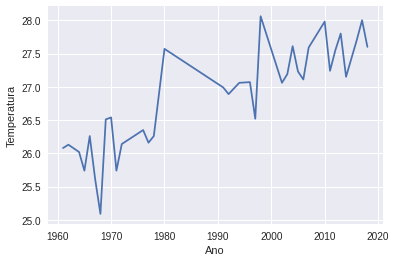

In [5]:
plt.plot(df_temperatura["YEAR"], df_temperatura["MAY"])
plt.xlabel("Ano")
plt.ylabel("Temperatura")

##Dividindo base de dados em treino e teste

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df_temperatura.drop(df_temperatura.columns[[0, 5]], axis=1), df_temperatura["MAY"], test_size=0.3)

##Criando modelo de regressão KNN

In [7]:
# Definindo o número de vizinhos.
knn = KNeighborsRegressor(n_neighbors=1)

##Treinando modelo

In [8]:
knn.fit(X_train, y_train) #Realiza o treinamento do modelo

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

##Validando modelo

In [9]:
resultado = knn.predict(X_test)
resultado

array([28.06, 27.15, 27.24, 27.55, 27.98, 26.99, 25.74, 26.99, 27.15,
       25.09, 26.99])

##Otimizando o parâmetro K

Melhores parametros {'n_neighbors': 3} com o valor de RMSE -0.3642051932604768 


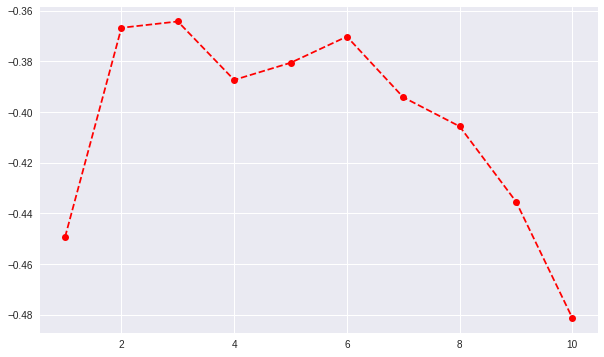

In [10]:
# Definindo a lista de valores.
k_list = list(range(1,11))

# Colocamos os valores em um dicionário
parametros = dict(n_neighbors=k_list)
metricas = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']

grid = GridSearchCV(knn, parametros, scoring='neg_root_mean_squared_error')

grid.fit(X_train, y_train)

print("Melhores parametros {} com o valor de RMSE {} ".format(grid.best_params_,grid.best_score_))

scores = grid.cv_results_
set_dados = scores.setdefault('mean_test_score')
plt.figure(figsize=(10,6))
plt.plot(k_list, set_dados, color='red', linestyle='dashed', marker='o')

##Plotando resultados

In [11]:
print(pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['Predito'], margins=True))

Predito  25.09  25.74  26.99  27.15  27.24  27.55  27.98  28.06  All
Real                                                                
25.62        1      0      0      0      0      0      0      0    1
25.74        0      1      0      0      0      0      0      0    1
26.52        0      0      0      1      0      0      0      0    1
26.89        0      0      1      0      0      0      0      0    1
27.06        0      0      0      0      1      0      0      0    1
27.07        0      0      1      0      0      0      0      0    1
27.11        0      0      0      1      0      0      0      0    1
27.19        0      0      1      0      0      0      0      0    1
27.23        0      0      0      0      0      0      0      1    1
27.59        0      0      0      0      0      1      0      0    1
27.8         0      0      0      0      0      0      1      0    1
All          1      1      3      2      1      1      1      1   11


##Plotando métricas de avaliações

In [12]:
print('Acurácia: ')
print(explained_variance_score(y_test,resultado))
print('Erro máx.: ')
print(max_error(y_test,resultado))
print('Erro médio absoluto: ')
print(mean_absolute_error(y_test,resultado))
print('Erro quadrático absoluto: ')
print(mean_squared_error(y_test,resultado))

Acurácia: 
0.7069267297505112
Erro máx.: 
0.8299999999999983
Erro médio absoluto: 
0.2554545454545453
Erro quadrático absoluto: 
0.13555454545454526


##Plotando gráfico com resultado esperado e previsto

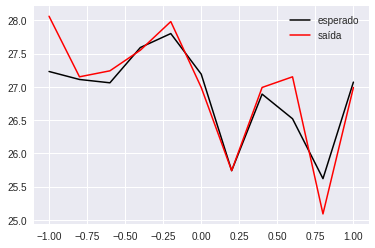

In [13]:
	plt.plot(np.linspace(-1, 1, 11), y_test, label='esperado', color='black', linewidth=1.5)
	plt.plot(np.linspace(-1, 1, 11), resultado, label='saída', color='red', linewidth=1.5)
	plt.legend()
	plt.show()